In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, GRU
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



# Read the dataset from Excel file
df = pd.read_excel('/Users/ayushanand/Documents/new_data/new_excel_file_merged(1).xlsx')


In [3]:
# Extract the features and targets from the dataset
X = df.iloc[:, 5:-23].values
y = df.iloc[:, -23:].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets for each split ratio
splits = [(0.8, 0.2), (0.7, 0.3), (0.75, 0.25)]
train_test_data = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split[0], test_size=split[1], random_state=42)
    train_test_data.append((X_train, X_test, y_train, y_test))


[[9.43000000e+01 1.17100000e+02 0.00000000e+00 ... 9.97033787e+00
  2.87200000e+02 7.00000000e-01]
 [1.00300000e+02 1.64400000e+02 1.00000000e-01 ... 9.97033787e+00
  2.69500000e+02 7.00000000e-01]
 [9.43000000e+01 1.47100000e+02 0.00000000e+00 ... 9.97033787e+00
  4.12800000e+02 6.00000000e-01]
 ...
 [5.17970000e+02 5.90690000e+02 5.20000000e-01 ... 1.08400000e+01
  6.05100000e+01 0.00000000e+00]
 [5.29600000e+02 3.92110000e+02 1.21000000e+00 ... 0.00000000e+00
  5.64100000e+01 0.00000000e+00]
 [5.13410000e+02 4.98340000e+02 7.00000000e-01 ... 0.00000000e+00
  5.49500000e+01 0.00000000e+00]]


In [4]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Reshape the data for SVR model
    X_train = train_test_data[i][0].reshape(-1, train_test_data[i][0].shape[-1])
    X_test = train_test_data[i][1].reshape(-1, train_test_data[i][1].shape[-1])
    y_train = train_test_data[i][2][:, 0]  # select the first column as target variable
    y_test = train_test_data[i][3][:, 0]  # select the first column as target variable
    
    # Scale the data for SVR model
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define and train the SVR model
    model = SVR()
    model.fit(X_train, y_train)
    
    # Evaluate the SVR model and print MSE and R2 scores
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"SVR MSE: {mse:.4f}")
    print(f"SVR R2: {r2:.4f}")


Split 1: Train 80.0%, Test 20.0%
SVR MSE: 21048.5324
SVR R2: 0.2838
Split 2: Train 70.0%, Test 30.0%
SVR MSE: 21538.5768
SVR R2: 0.2658
Split 3: Train 75.0%, Test 25.0%
SVR MSE: 20932.8236
SVR R2: 0.2826


In [6]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Reshape the input data for LSTM model
    X_train = np.reshape(train_test_data[i][0], (train_test_data[i][0].shape[0], 1, train_test_data[i][0].shape[1]))
    X_test = np.reshape(train_test_data[i][1], (train_test_data[i][1].shape[0], 1, train_test_data[i][1].shape[1]))
    
    # Define and train the LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(1, X.shape[1]), activation='relu'))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, train_test_data[i][2], epochs=100, batch_size=32)
    
    # Evaluate the LSTM model and print MSE and R2 scores
    y_pred = model.predict(X_test)
    mse = mean_squared_error(train_test_data[i][3], y_pred)
    r2 = r2_score(train_test_data[i][3], y_pred)
    print(f"LSTM MSE: {mse:.4f}")
    print(f"LSTM R2: {r2:.4f}")


Split 1: Train 80.0%, Test 20.0%
Metal device set to: Apple M1 Pro


2023-04-19 15:07:24.528489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-19 15:07:24.528655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2023-04-19 15:07:25.086878: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-19 15:07:25.367978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 3s 19ms/step - loss: 61983.2578
Epoch 2/100
54/54 [==============================] - 1s 13ms/step - loss: 60688.0898
Epoch 3/100
54/54 [==============================] - 1s 12ms/step - loss: 57068.5469
Epoch 4/100
54/54 [==============================] - 1s 12ms/step - loss: 51718.2969
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 45532.0430
Epoch 6/100
54/54 [==============================] - 1s 12ms/step - loss: 39315.4766
Epoch 7/100
54/54 [==============================] - 1s 12ms/step - loss: 33636.9258
Epoch 8/100
54/54 [==============================] - 1s 12ms/step - loss: 28752.9121
Epoch 9/100
54/54 [==============================] - 1s 12ms/step - loss: 24625.4043
Epoch 10/100
54/54 [==============================] - 1s 12ms/step - loss: 21311.8613
Epoch 11/100
54/54 [==============================] - 1s 12ms/step - loss: 18702.9844
Epoch 12/100
54/54 [==============================] - 1s 12ms/step - loss: 

2023-04-19 15:08:34.624121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 15ms/step
LSTM MSE: 7052.0268
LSTM R2: 0.1871
Split 2: Train 70.0%, Test 30.0%
Epoch 1/100


2023-04-19 15:08:35.180148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 1s 14ms/step - loss: 62050.2461
Epoch 2/100
47/47 [==============================] - 1s 13ms/step - loss: 61181.7344
Epoch 3/100
47/47 [==============================] - 1s 12ms/step - loss: 58444.8516
Epoch 4/100
47/47 [==============================] - 1s 12ms/step - loss: 54088.8242
Epoch 5/100
47/47 [==============================] - 1s 12ms/step - loss: 48893.3750
Epoch 6/100
47/47 [==============================] - 1s 13ms/step - loss: 43535.3359
Epoch 7/100
47/47 [==============================] - 1s 13ms/step - loss: 38379.0664
Epoch 8/100
47/47 [==============================] - 1s 12ms/step - loss: 33707.4531
Epoch 9/100
47/47 [==============================] - 1s 12ms/step - loss: 29581.1074
Epoch 10/100
47/47 [==============================] - 1s 12ms/step - loss: 25968.7793
Epoch 11/100
47/47 [==============================] - 1s 13ms/step - loss: 22913.5352
Epoch 12/100
47/47 [==============================] - 1s 13ms/step - loss: 

2023-04-19 15:09:34.590759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-19 15:09:35.025858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 14ms/step - loss: 61908.8164
Epoch 2/100
50/50 [==============================] - 1s 12ms/step - loss: 60583.3945
Epoch 3/100
50/50 [==============================] - 1s 12ms/step - loss: 56866.0625
Epoch 4/100
50/50 [==============================] - 1s 12ms/step - loss: 51435.4453
Epoch 5/100
50/50 [==============================] - 1s 12ms/step - loss: 45340.7969
Epoch 6/100
50/50 [==============================] - 1s 12ms/step - loss: 39346.6992
Epoch 7/100
50/50 [==============================] - 1s 12ms/step - loss: 33916.3750
Epoch 8/100
50/50 [==============================] - 1s 12ms/step - loss: 29228.6172
Epoch 9/100
50/50 [==============================] - 1s 12ms/step - loss: 25271.7676
Epoch 10/100
50/50 [==============================] - 1s 12ms/step - loss: 21865.4473
Epoch 11/100
50/50 [==============================] - 1s 12ms/step - loss: 19068.6426
Epoch 12/100
50/50 [==============================] - 1s 12ms/step - loss: 

2023-04-19 15:10:36.424954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [7]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Reshape the input data for RNN model
    X_train = np.reshape(train_test_data[i][0], (train_test_data[i][0].shape[0], 1, train_test_data[i][0].shape[1]))
    X_test = np.reshape(train_test_data[i][1], (train_test_data[i][1].shape[0], 1, train_test_data[i][1].shape[1]))
    
    # Define and train the RNN model
    model = Sequential()
    model.add(SimpleRNN(64, input_shape=(1, X.shape[1]), activation='relu'))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, train_test_data[i][2], epochs=100, batch_size=32)
    
    # Evaluate the RNN model and print MSE and R2 scores
    y_pred = model.predict(X_test)
    mse = mean_squared_error(train_test_data[i][3], y_pred)
    r2 = r2_score(train_test_data[i][3], y_pred)
    print(f"RNN MSE: {mse:.4f}")
    print(f"RNN R2: {r2:.4f}")


Split 1: Train 80.0%, Test 20.0%
Epoch 1/100
 5/54 [=>............................] - ETA: 0s - loss: 58162.1250 

2023-04-19 15:11:09.085309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 12ms/step - loss: 61823.4922
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 60315.9336
Epoch 3/100
54/54 [==============================] - 1s 9ms/step - loss: 57015.3828
Epoch 4/100
54/54 [==============================] - 1s 9ms/step - loss: 52086.2148
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 46296.6094
Epoch 6/100
54/54 [==============================] - 1s 9ms/step - loss: 40382.4102
Epoch 7/100
54/54 [==============================] - 1s 9ms/step - loss: 34840.4336
Epoch 8/100
54/54 [==============================] - 1s 9ms/step - loss: 29947.1973
Epoch 9/100
54/54 [==============================] - 1s 9ms/step - loss: 25822.7754
Epoch 10/100
54/54 [==============================] - 1s 9ms/step - loss: 22450.9531
Epoch 11/100
54/54 [==============================] - 1s 9ms/step - loss: 19744.5332
Epoch 12/100
54/54 [==============================] - 1s 9ms/step - loss: 17600.275

2023-04-19 15:12:01.270203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 6/47 [==>...........................] - ETA: 0s - loss: 64411.3594 

2023-04-19 15:12:01.796893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 1s 11ms/step - loss: 61911.2461
Epoch 2/100
47/47 [==============================] - 0s 9ms/step - loss: 60723.6289
Epoch 3/100
47/47 [==============================] - 0s 9ms/step - loss: 58218.4727
Epoch 4/100
47/47 [==============================] - 0s 9ms/step - loss: 54512.3672
Epoch 5/100
47/47 [==============================] - 0s 9ms/step - loss: 49864.3477
Epoch 6/100
47/47 [==============================] - 0s 9ms/step - loss: 44682.9648
Epoch 7/100
47/47 [==============================] - 0s 10ms/step - loss: 39448.1719
Epoch 8/100
47/47 [==============================] - 0s 9ms/step - loss: 34512.9766
Epoch 9/100
47/47 [==============================] - 0s 9ms/step - loss: 30020.5039
Epoch 10/100
47/47 [==============================] - 0s 9ms/step - loss: 26074.6250
Epoch 11/100
47/47 [==============================] - 0s 9ms/step - loss: 22767.0410
Epoch 12/100
47/47 [==============================] - 0s 9ms/step - loss: 20077.8496

2023-04-19 15:12:48.049409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 5/50 [==>...........................] - ETA: 0s - loss: 64637.1875 

2023-04-19 15:12:48.389194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 11ms/step - loss: 61829.3164
Epoch 2/100
50/50 [==============================] - 0s 10ms/step - loss: 60552.5625
Epoch 3/100
50/50 [==============================] - 0s 10ms/step - loss: 57788.5586
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 53716.7422
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 48750.1484
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 43433.8750
Epoch 7/100
50/50 [==============================] - 0s 10ms/step - loss: 38241.8398
Epoch 8/100
50/50 [==============================] - 0s 10ms/step - loss: 33485.0898
Epoch 9/100
50/50 [==============================] - 0s 9ms/step - loss: 29306.1680
Epoch 10/100
50/50 [==============================] - 0s 10ms/step - loss: 25728.7031
Epoch 11/100
50/50 [==============================] - 0s 10ms/step - loss: 22719.2363
Epoch 12/100
50/50 [==============================] - 0s 10ms/step - loss: 2020

2023-04-19 15:13:37.370235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [8]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Define and train the ANN model
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(y.shape[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_test_data[i][0], train_test_data[i][2], epochs=100, batch_size=32)
    
    # Evaluate the ANN model and print MSE and R2 scores
    y_pred = model.predict(train_test_data[i][1])
    mse = mean_squared_error(train_test_data[i][3], y_pred)
    r2 = r2_score(train_test_data[i][3], y_pred)
    print(f"ANN MSE: {mse:.4f}")
    print(f"ANN R2: {r2:.4f}")


Split 1: Train 80.0%, Test 20.0%
Epoch 1/100
21/54 [==========>...................] - ETA: 0s - loss: 61751.9375

2023-04-19 15:13:57.402279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 5ms/step - loss: 61780.2070
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 60041.2695
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 56335.5078
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 51174.1562
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 45251.6289
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 39253.8594
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 33687.0117
Epoch 8/100
54/54 [==============================] - 0s 4ms/step - loss: 28841.4199
Epoch 9/100
54/54 [==============================] - 0s 5ms/step - loss: 24783.7305
Epoch 10/100
54/54 [==============================] - 0s 5ms/step - loss: 21508.1797
Epoch 11/100
54/54 [==============================] - 0s 5ms/step - loss: 18937.5215
Epoch 12/100
54/54 [==============================] - 0s 4ms/step - loss: 16956.3789
E

2023-04-19 15:14:22.582064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-19 15:14:22.737177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 0s 5ms/step - loss: 61887.5898
Epoch 2/100
47/47 [==============================] - 0s 4ms/step - loss: 60840.6953
Epoch 3/100
47/47 [==============================] - 0s 4ms/step - loss: 58632.3789
Epoch 4/100
47/47 [==============================] - 0s 4ms/step - loss: 55316.9492
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: 51213.4375
Epoch 6/100
47/47 [==============================] - 0s 4ms/step - loss: 46668.3984
Epoch 7/100
47/47 [==============================] - 0s 4ms/step - loss: 42011.8164
Epoch 8/100
47/47 [==============================] - 0s 4ms/step - loss: 37459.0078
Epoch 9/100
47/47 [==============================] - 0s 4ms/step - loss: 33216.8750
Epoch 10/100
47/47 [==============================] - 0s 4ms/step - loss: 29382.6406
Epoch 11/100
47/47 [==============================] - 0s 4ms/step - loss: 25941.3555
Epoch 12/100
47/47 [==============================] - 0s 4ms/step - loss: 22984.7773
E

2023-04-19 15:14:44.984931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-04-19 15:14:45.147133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 0s 6ms/step - loss: 61796.7461
Epoch 2/100
50/50 [==============================] - 0s 5ms/step - loss: 60433.6484
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 57595.8008
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 53512.6758
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 48555.1211
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 43239.4844
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 38031.5195
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 33209.4062
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 28960.2227
Epoch 10/100
50/50 [==============================] - 0s 5ms/step - loss: 25290.3809
Epoch 11/100
50/50 [==============================] - 0s 5ms/step - loss: 22198.0723
Epoch 12/100
50/50 [==============================] - 0s 5ms/step - loss: 19698.8105
E

2023-04-19 15:15:08.956749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [11]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Define and train the MLR model
    model = LinearRegression()
    model.fit(train_test_data[i][0], train_test_data[i][2])
    
    # Evaluate the MLR model and print MSE and R2 scores
    y_pred = model.predict(train_test_data[i][1])
    mse = mean_squared_error(train_test_data[i][3], y_pred)
    r2 = r2_score(train_test_data[i][3], y_pred)
    print(f"MLR MSE: {mse:.4f}")
    print(f"MLR R2: {r2:.4f}")


Split 1: Train 80.0%, Test 20.0%
MLR MSE: 6435.6946
MLR R2: 0.3750
Split 2: Train 70.0%, Test 30.0%
MLR MSE: 6160.9629
MLR R2: 0.3754
Split 3: Train 75.0%, Test 25.0%
MLR MSE: 6419.1679
MLR R2: 0.3785


In [30]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Define and train the RFR model
    model = RandomForestRegressor()
    model.fit(train_test_data[i][0], train_test_data[i][2])
    
    # Evaluate the RFR model and print MSE and R2 scores
    y_pred = model.predict(train_test_data[i][1])
    mse = mean_squared_error(train_test_data[i][3], y_pred)
    r2 = r2_score(train_test_data[i][3], y_pred)
    print(f"RFR MSE: {mse:.4f}")
    print(f"RFR R2: {r2:.4f}")


Split 1: Train 80.0%, Test 20.0%
RFR MSE: 322.9069
RFR R2: 0.5991
Split 2: Train 70.0%, Test 30.0%
RFR MSE: 340.1703
RFR R2: 0.7951
Split 3: Train 75.0%, Test 25.0%
RFR MSE: 329.0925
RFR R2: 0.5519


In [29]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Reshape the data for Gradient Boosting Regressor model
    X_train = train_test_data[i][0].reshape(train_test_data[i][0].shape[0], -1)
    X_test = train_test_data[i][1].reshape(train_test_data[i][1].shape[0], -1)
    y_train = train_test_data[i][2][:, 0]  # select the first column as target variable
    y_test = train_test_data[i][3][:, 0]  # select the first column as target variable
    
    # Define and train the Gradient Boosting Regressor model
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train)
    
    # Evaluate the Gradient Boosting Regressor model and print MSE and R2 scores
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Gradient Boosting Regressor MSE: {mse:.4f}")
    print(f"Gradient Boosting Regressor R2: {r2:.4f}")



Split 1: Train 80.0%, Test 20.0%
Gradient Boosting Regressor MSE: 180.4505
Gradient Boosting Regressor R2: 0.9939
Split 2: Train 70.0%, Test 30.0%
Gradient Boosting Regressor MSE: 188.1848
Gradient Boosting Regressor R2: 0.9936
Split 3: Train 75.0%, Test 25.0%
Gradient Boosting Regressor MSE: 196.9540
Gradient Boosting Regressor R2: 0.9932


In [14]:
for i, split in enumerate(splits):
    print(f"Split {i+1}: Train {split[0]*100}%, Test {split[1]*100}%")
    
    # Reshape the data for Decision Tree Regressor model
    X_train = train_test_data[i][0].reshape(-1, train_test_data[i][0].shape[-1])
    X_test = train_test_data[i][1].reshape(-1, train_test_data[i][1].shape[-1])
    y_train = train_test_data[i][2]
    y_test = train_test_data[i][3]
    
    # Define and train the Decision Tree Regressor model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    
    # Evaluate the Decision Tree Regressor model and print MSE and R2 scores
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Decision Tree Regressor MSE: {mse:.4f}")
    print(f"Decision Tree Regressor R2: {r2:.4f}")

    

Split 1: Train 80.0%, Test 20.0%
Decision Tree Regressor MSE: 13884.9427
Decision Tree Regressor R2: -0.4502
Split 2: Train 70.0%, Test 30.0%
Decision Tree Regressor MSE: 12578.5677
Decision Tree Regressor R2: -0.2909
Split 3: Train 75.0%, Test 25.0%
Decision Tree Regressor MSE: 12741.3556
Decision Tree Regressor R2: -0.2383


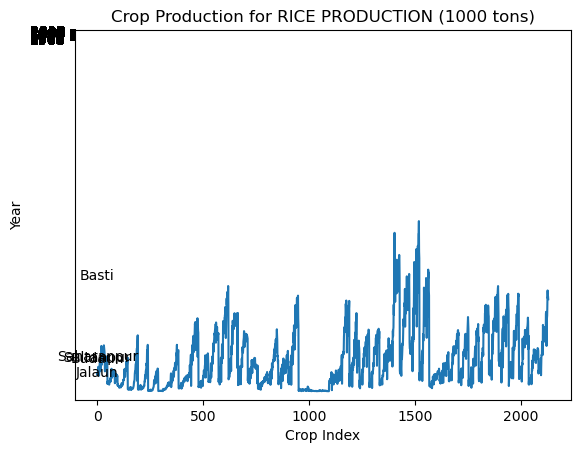

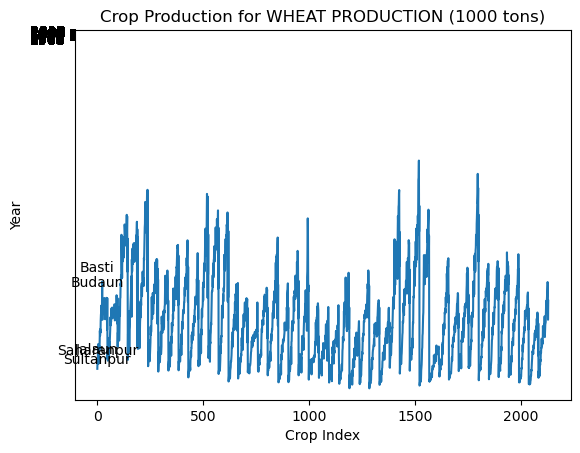

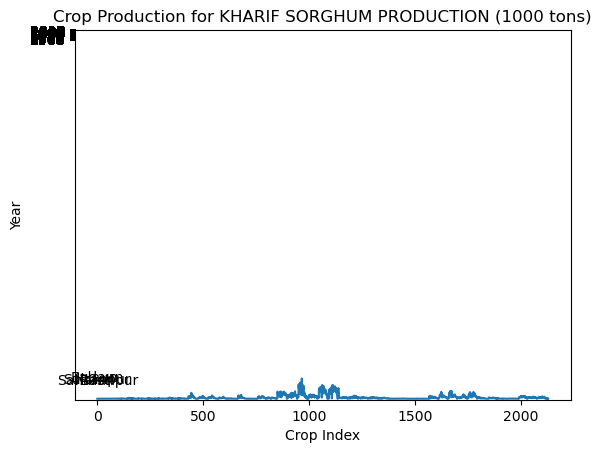

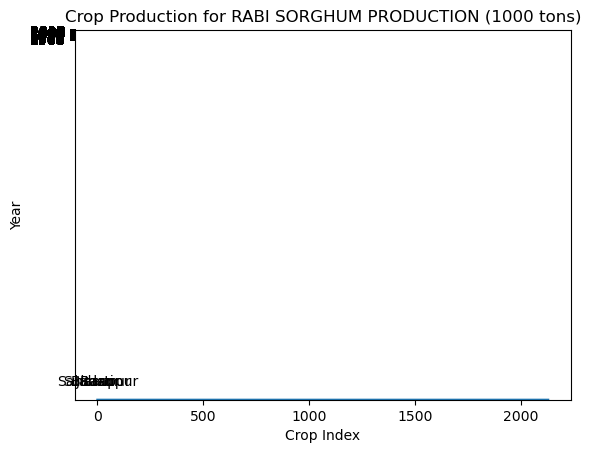

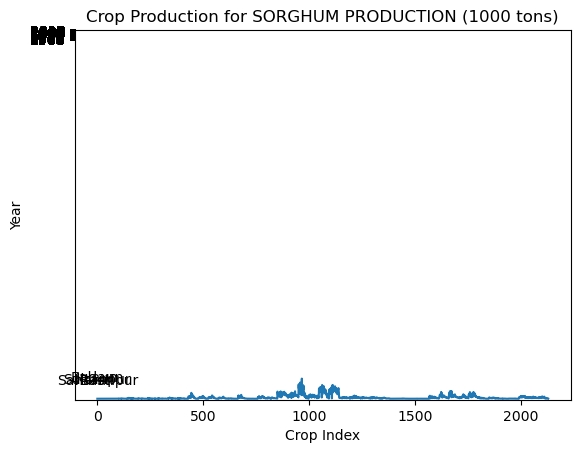

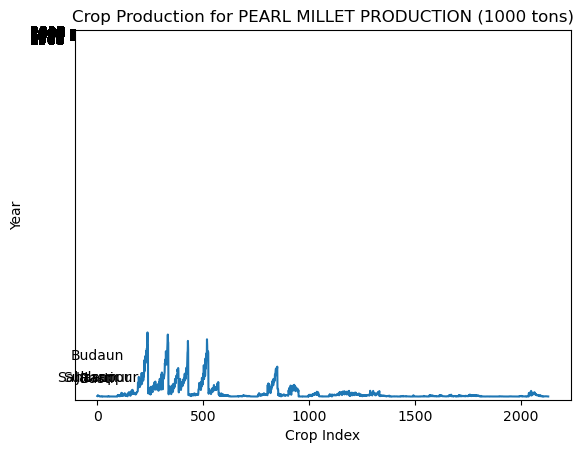

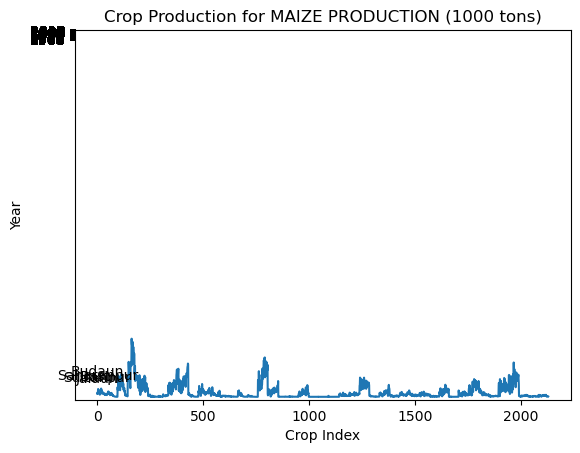

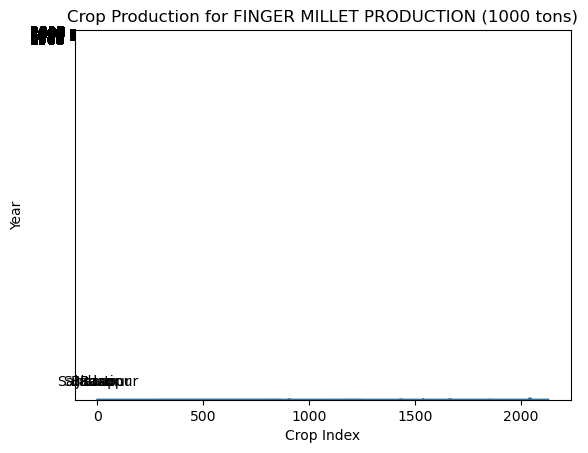

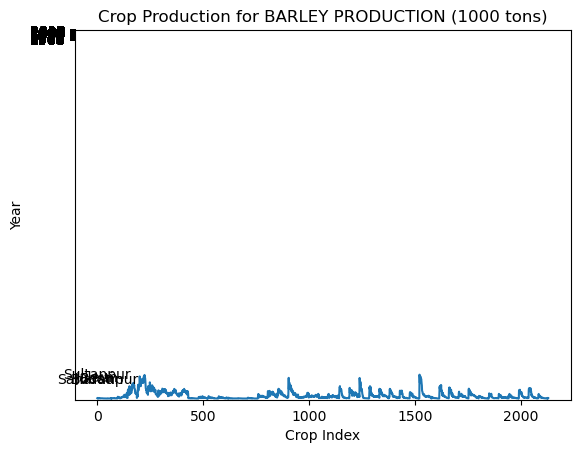

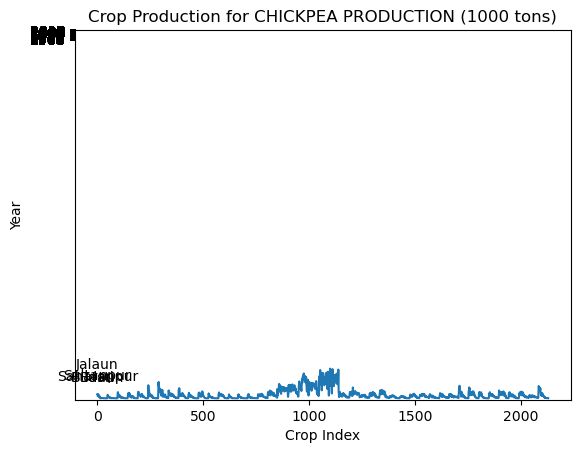

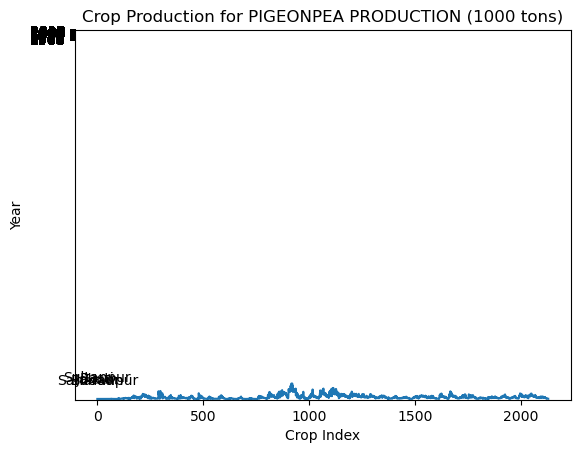

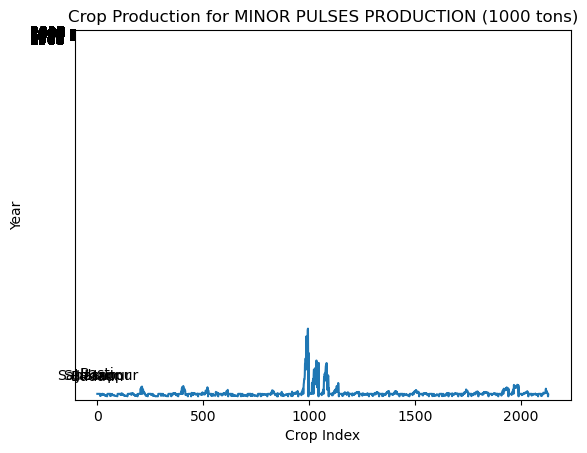

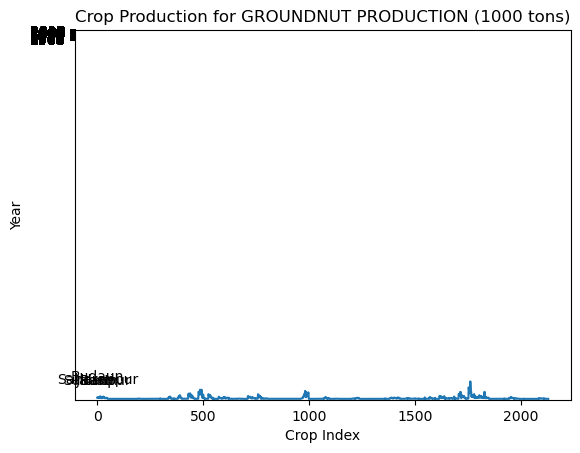

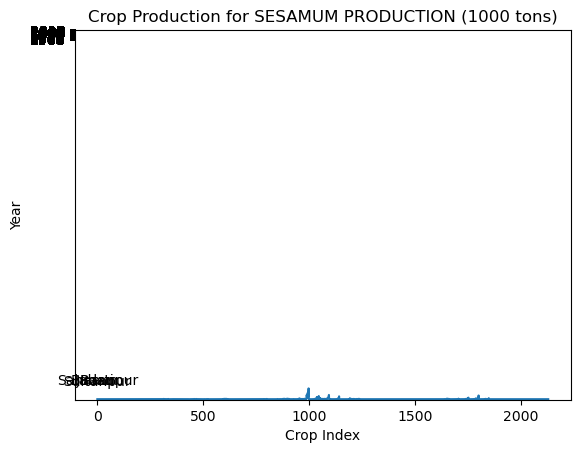

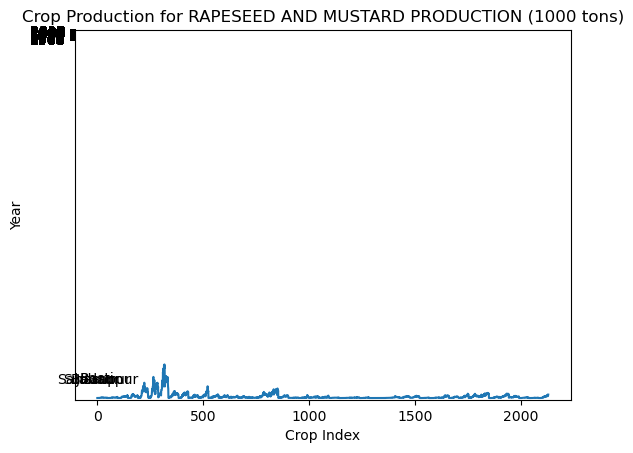

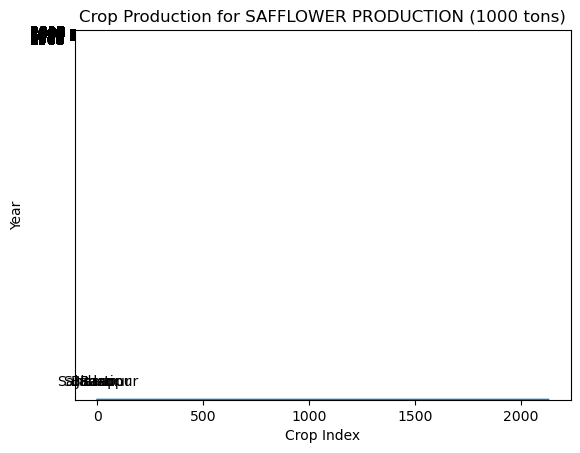

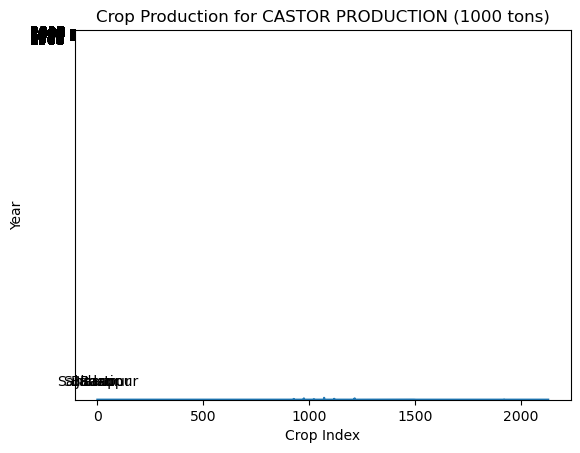

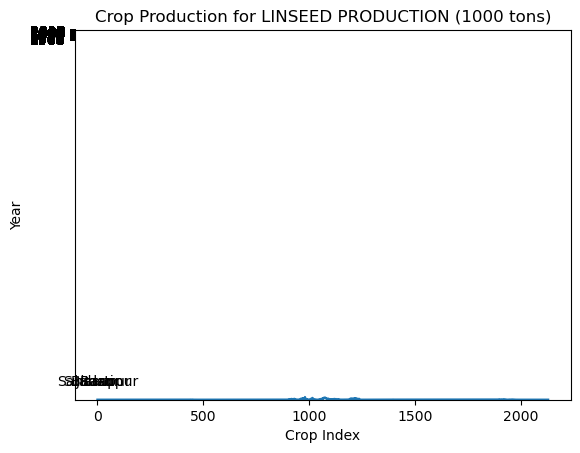

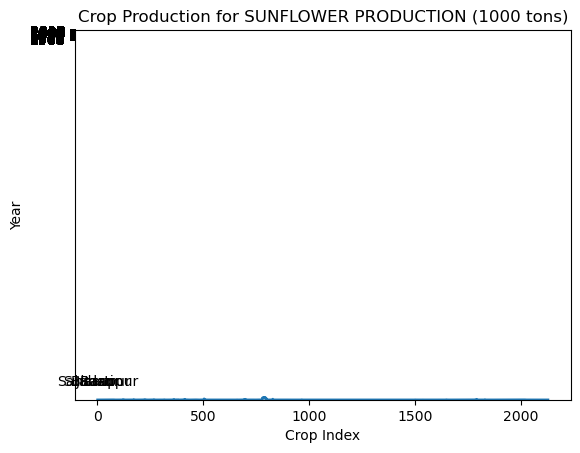

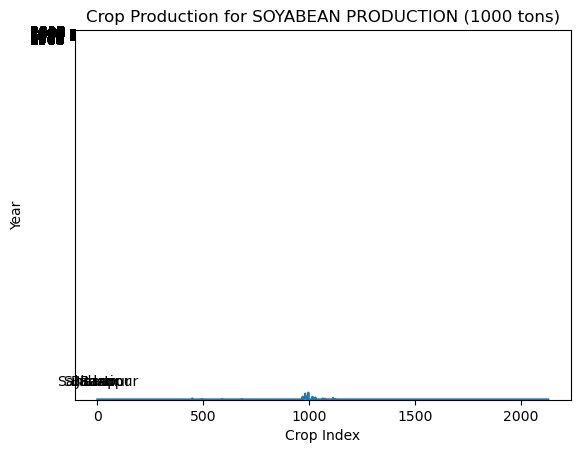

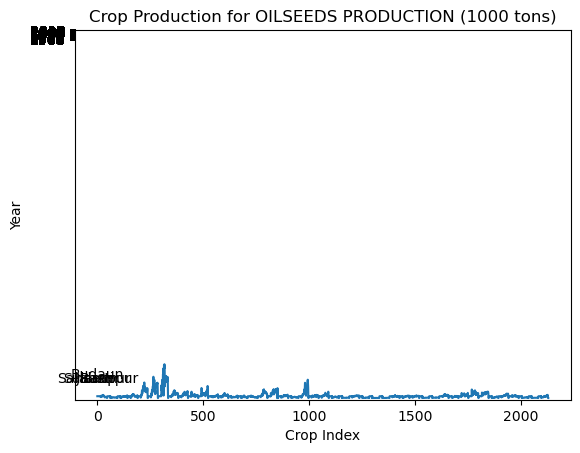

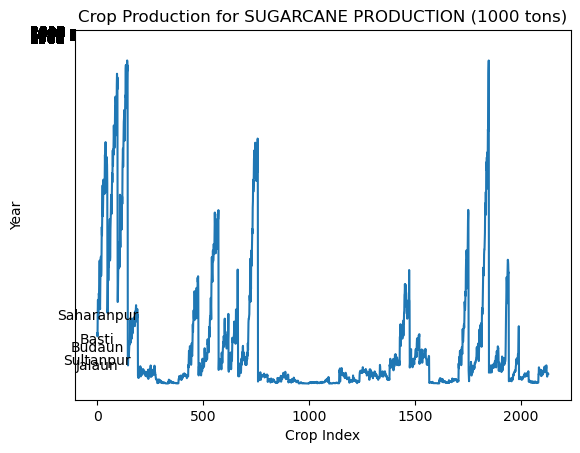

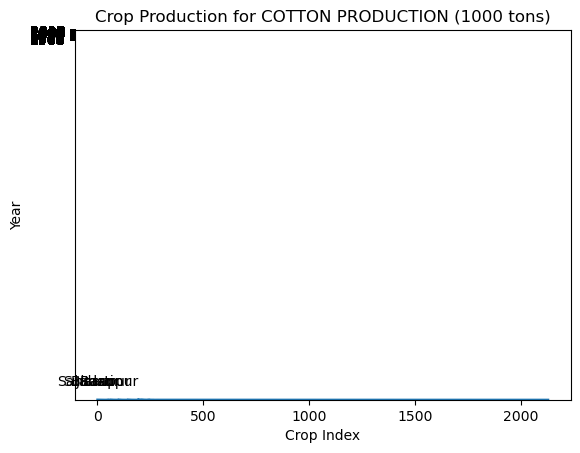

In [39]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the columns of interest
year = df.iloc[:, 1]
district = df.iloc[:, 4]
crops = df.iloc[:, -23:]
crop_names = list(crops.columns)

# Create a separate plot for each crop
for i, crop in enumerate(crop_names):
    fig, ax = plt.subplots()
    ax.plot(crops.iloc[:, i])
    ax.set(xlabel='Crop Index', ylabel='Year',
           title='Crop Production for ' + crop)
    
    # Set y-axis to show only the year
    ax.set_yticks(year)
    ax.set_yticklabels(year.astype(int))

    # Add district labels to the plot
    for j, txt in enumerate(district):
        if j % 500 == 0:  # Add label for every 10th data point
            ax.annotate(str(txt), (0, crops.values[j, i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Show the plot
    plt.show()


